In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [205]:
root_path = '/content/drive/MyDrive/Information Retrieval/Assignment5_IR/'

Download some useful libraries to generate prettier outputs :)

In [ ]:
!pip install jedi rich


In [207]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

from rich import print


In [208]:
d = 0.15
iterations_count = 10
initial_page_score = 1

graphs_count = None
graphs = {}
scores = {}
adjacency_matrices = None
input_path = root_path + 'input.txt'
output_path = root_path + 'output.txt'
plots_path = root_path + 'plots/'

In [209]:
def read_input_file(path):
  f = open(path, 'r')
  lines =  f.read().split('\n')
  f.close()

  return lines

In [210]:
inputs = read_input_file(input_path)


In [211]:
def parse(inputs):
  adjacency_matrices = {}
  inputs = inputs.copy()

  graphs_count = inputs[0]
  del inputs[0]

  counter = 0

  for input in inputs:
    if input == '#':
      counter += 1
      adjacency_matrix = np.array([], dtype=int)
      rows_count = 1

    else:
      input = input.split()
      input = list(map(int, input))
      adjacency_matrix = np.append(adjacency_matrix, input)
      adjacency_matrix = adjacency_matrix.reshape((rows_count, len(input)))
      rows_count += 1

      adjacency_matrices[f'matrix{counter}'] = adjacency_matrix

  return graphs_count, adjacency_matrices

In [212]:
graphs_count, adjacency_matrices = parse(inputs)
print('Graphs Count:', graphs_count)
print('Adjacency Matrices:\n', adjacency_matrices)

Graphs Count: 2

Adjacency Matrices:

{
    'matrix1': array([[0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0]]),
    'matrix2': array([[0, 1, 1],
       [0, 0, 1],
       [1, 0, 0]])
}

In [213]:
for index, adjacency_matrix in enumerate(adjacency_matrices.values()):
  nodes_count = adjacency_matrix.shape[0]
  graph = nx.DiGraph()
  graph.add_nodes_from([i for i in range(nodes_count)])

  for i in range(nodes_count):

    predecessors = np.where(adjacency_matrix[:,i] == 1)[0]
    for predecessor in predecessors:
      graph.add_edge(predecessor, i)

    successors = np.where(adjacency_matrix[i,:] == 1)[0]
    for successor in successors:
      graph.add_edge(i, successor)

  graphs[f'graph{index}'] = graph


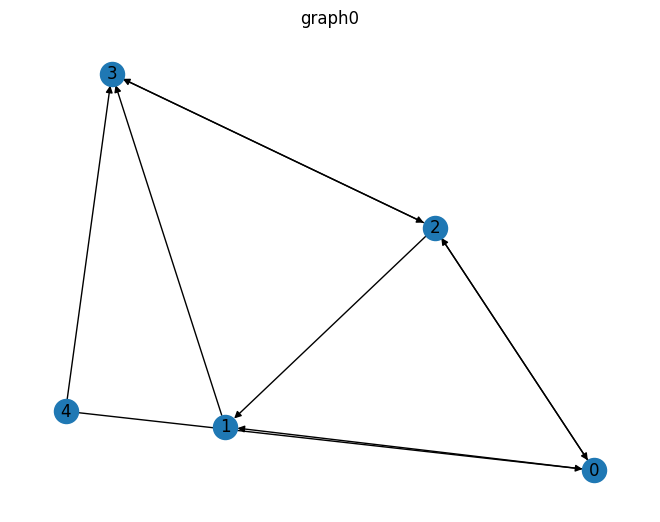

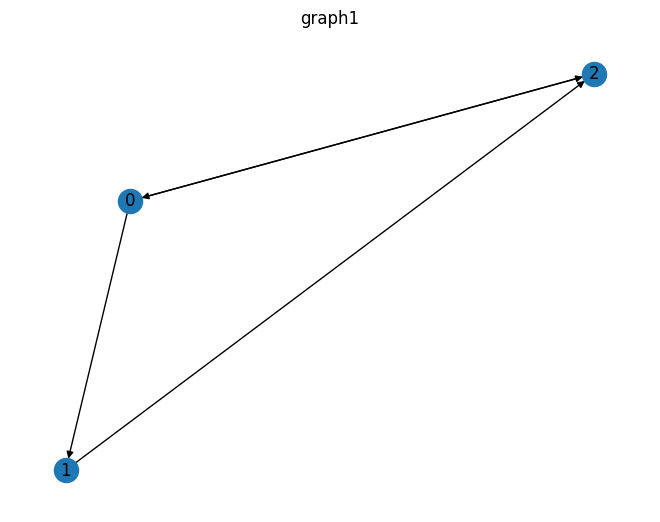

In [214]:
for graph_name in graphs:
  graph = graphs[graph_name]
  nx.draw(graph, with_labels=True)
  plt.title(graph_name)
  plt.axis("off")
  plt.show()

In [215]:
for graph_name in graphs:
  scores[graph_name] = {}
  graph = graphs[graph_name]
  N = graph.number_of_nodes()
  for iteration_number in range(1, iterations_count + 1):
    scores[graph_name][f'iteration{iteration_number}'] = {}

    for node in graph.nodes:
      if iteration_number == 1:
        scores[graph_name][f'iteration{iteration_number}'][node] = 1
        continue

      score = 0
      for predecessor in graph.predecessors(node):
        score += scores[graph_name][f'iteration{iteration_number-1}'][predecessor] / graph.out_degree(predecessor)

      score = ((1 - d) / N) + d * score
      scores[graph_name][f'iteration{iteration_number}'][node] = score


Print result

In [216]:
indent = 4 * ' '

for graph_name in graphs:
  graph = graphs[graph_name]
  print(graph_name)
  for iteration_number in range(1, iterations_count + 1):
    print(indent + f'Iteration#{iteration_number}')
    for node in graph.nodes:
      print(2 * indent + f'node{node}# =>', scores[graph_name][f'iteration{iteration_number}'][node])

  print(40 * '_') 

graph0

Iteration#1

node0# => 1

node1# => 1

node2# => 1

node3# => 1

node4# => 1

Iteration#2

node0# => 0.295

node1# => 0.295

node2# => 0.39499999999999996

node3# => 0.44499999999999995

node4# => 0.16999999999999998

Iteration#3

node0# => 0.20249999999999999

node1# => 0.21187499999999998

node2# => 0.25887499999999997

node3# => 0.24674999999999997

node4# => 0.16999999999999998

Iteration#4

node0# => 0.19569374999999997

node1# => 0.19813124999999998

node2# => 0.22219999999999998

node3# => 0.22747499999999998

node4# => 0.16999999999999998

Iteration#5

node0# => 0.19385999999999998

node1# => 0.19578703124999997

node2# => 0.21879828124999998

node3# => 0.22357968749999999

node4# => 0.16999999999999998

Iteration#6

node0# => 0.19368991406249997

node1# => 0.19547941406249997

node2# => 0.21807645312499999

node3# => 0.22305796874999997

node4# => 0.16999999999999998

Iteration#7

node0# => 0.19365382265624997

node1# => 0.1954305662109375

node2# => 0.21798543886718746

node3# => 0.22297573476562496

node4# => 0.16999999999999998

Iteration#8

node0# => 0.19364927194335935

node1# => 0.19542330864257812

node2# => 0.21797039691406248

node3# => 0.22296385687499998

node4# => 0.16999999999999998

Iteration#9

node0# => 0.1936485198457031

node1# => 0.19542221524145506

node2# => 0.21796827392700194

node3# => 0.22296201614208982

node4# => 0.16999999999999998

Iteration#10

node0# => 0.19364841369635008

node1# => 0.1954220526847778

node2# => 0.21796794140974118

node3# => 0.22296174598256835

node4# => 0.16999999999999998

________________________________________

graph1

Iteration#1

node0# => 1

node1# => 1

node2# => 1

Iteration#2

node0# => 0.43333333333333335

node1# => 0.35833333333333334

node2# => 0.5083333333333333

Iteration#3

node0# => 0.3595833333333333

node1# => 0.3158333333333333

node2# => 0.3695833333333333

Iteration#4

node0# => 0.3387708333333333

node1# => 0.3103020833333333

node2# => 0.3576770833333333

Iteration#5

node0# => 0.3369848958333333

node1# => 0.30874114583333334

node2# => 0.35528645833333333

Iteration#6

node0# => 0.33662630208333333

node1# => 0.30860720052083335

node2# => 0.35491837239583335

Iteration#7

node0# => 0.33657108919270834

node1# => 0.3085803059895833

node2# => 0.3548713860677083

Iteration#8

node0# => 0.3365640412434896

node1# => 0.30857616502278645

node2# => 0.35486321092122397

Iteration#9

node0# => 0.3365628149715169

node1# => 0.308575636426595

node2# => 0.354862061180013

Iteration#10

node0# => 0.3365626425103353

node1# => 0.3085755444561971

node2# => 0.35486188992018636

________________________________________

Write result to file

In [217]:
with open(output_path, 'w') as f:
  for graph_name in graphs:
    f.write(graph_name + '\n')
    graph = graphs[graph_name]
    for iteration_number in range(1, iterations_count + 1):
      f.write(plots_path + f"{list(scores[graph_name][f'iteration{iteration_number}'].values())}\n")
    f.write(100 * '_' + '\n')
    

Plot the result

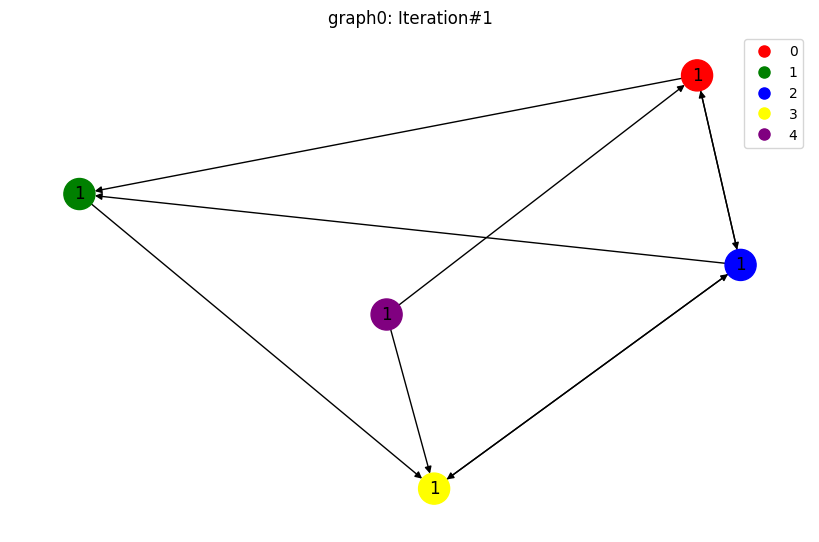

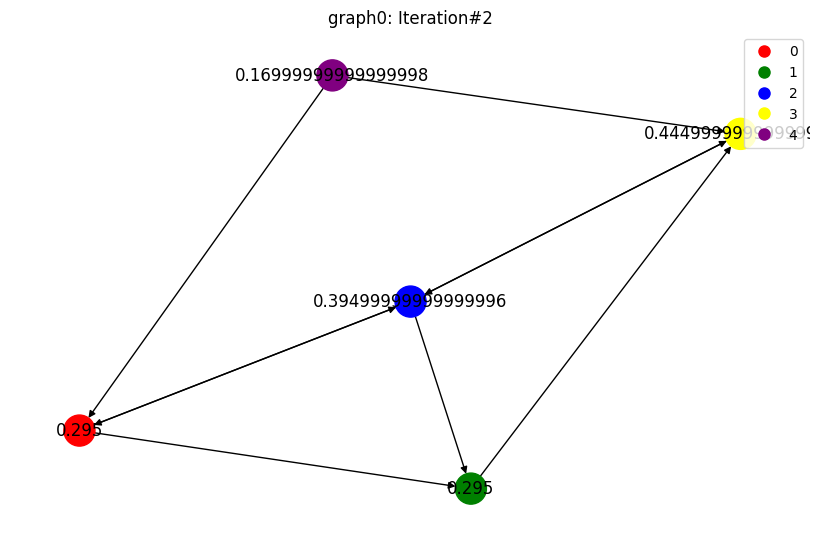

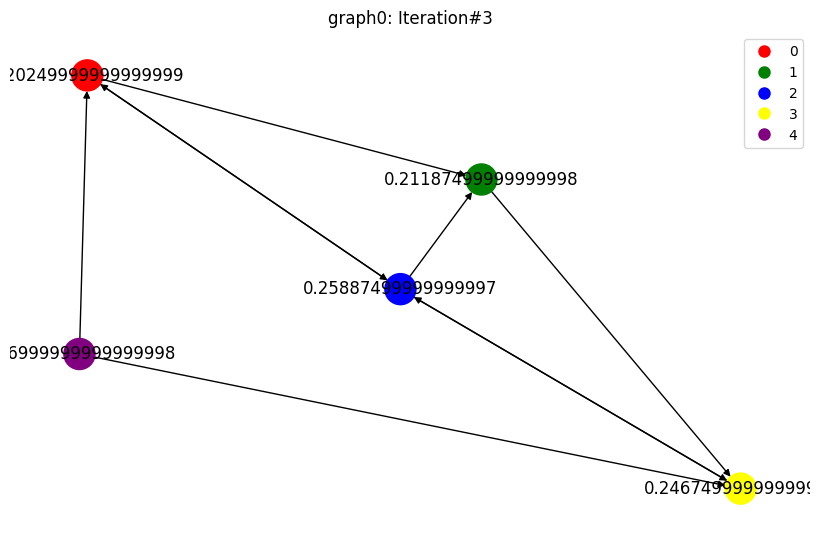

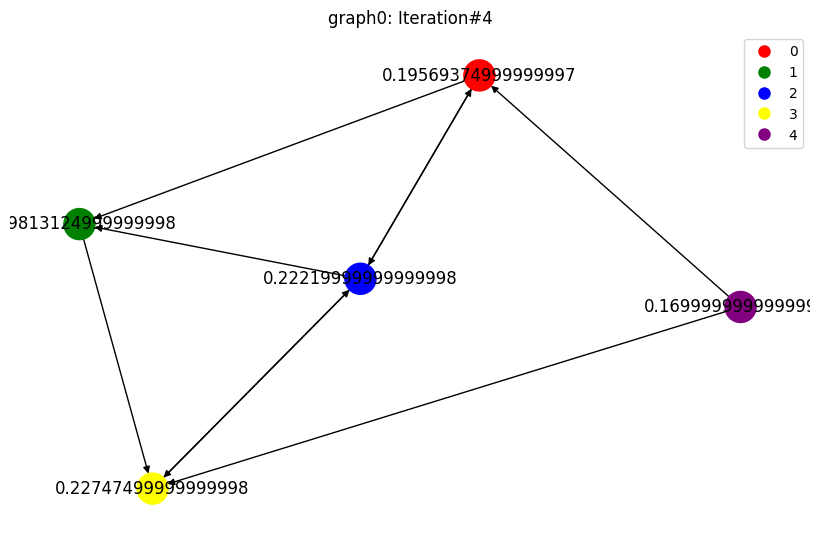

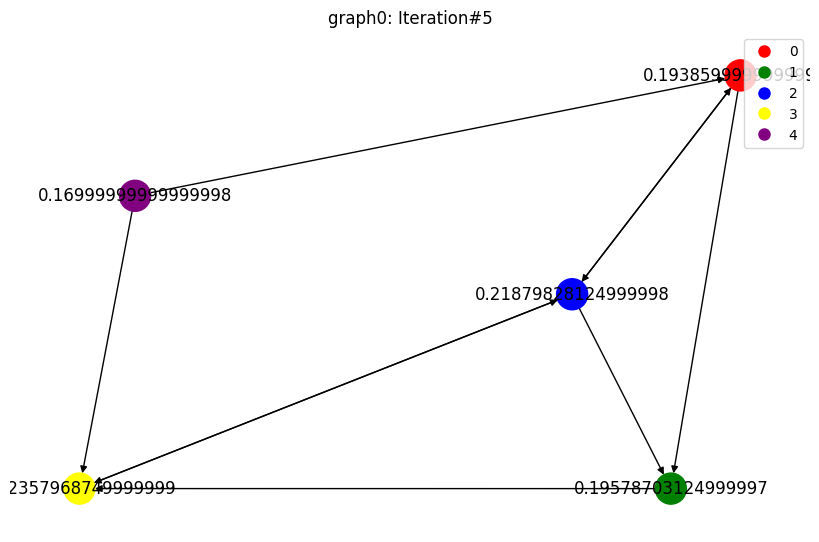

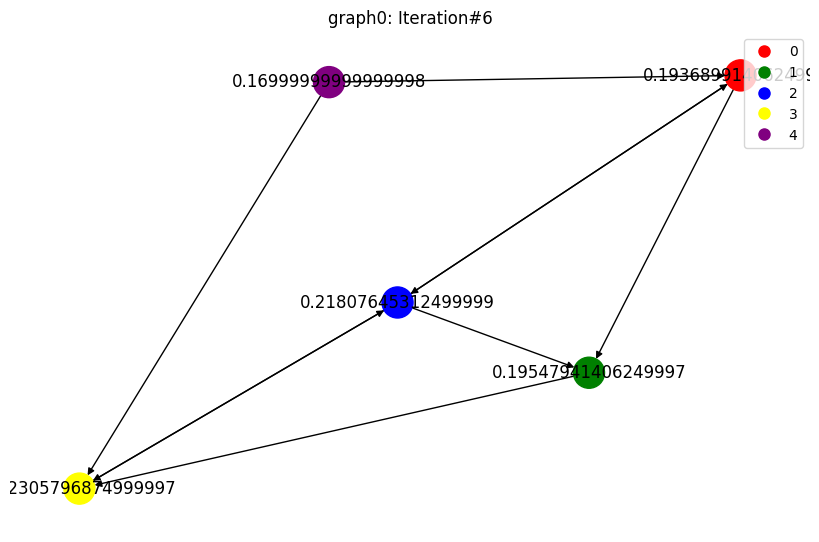

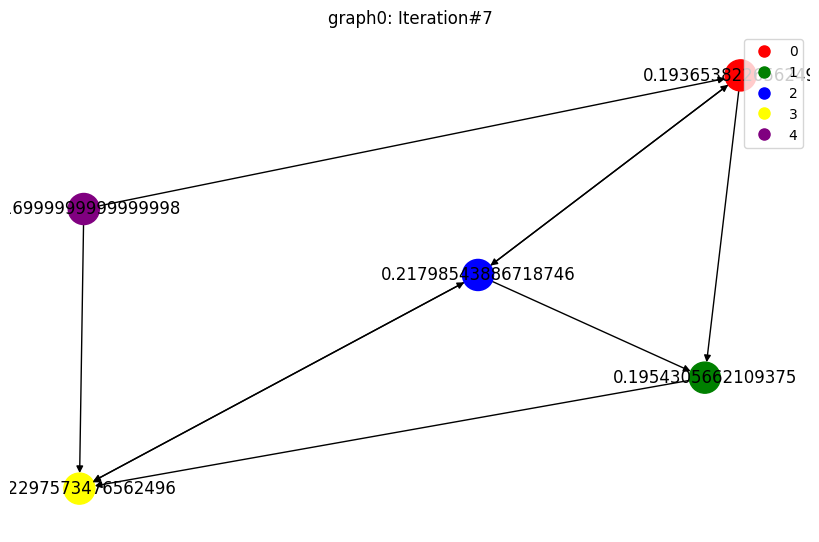

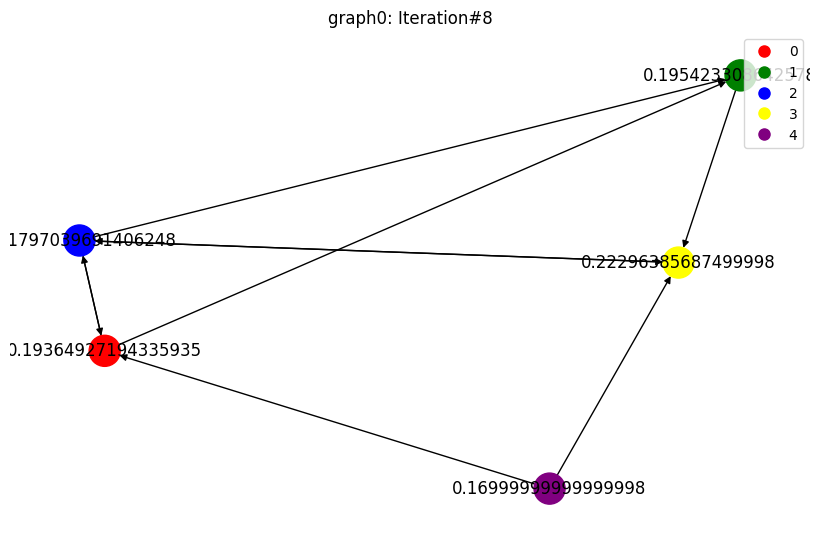

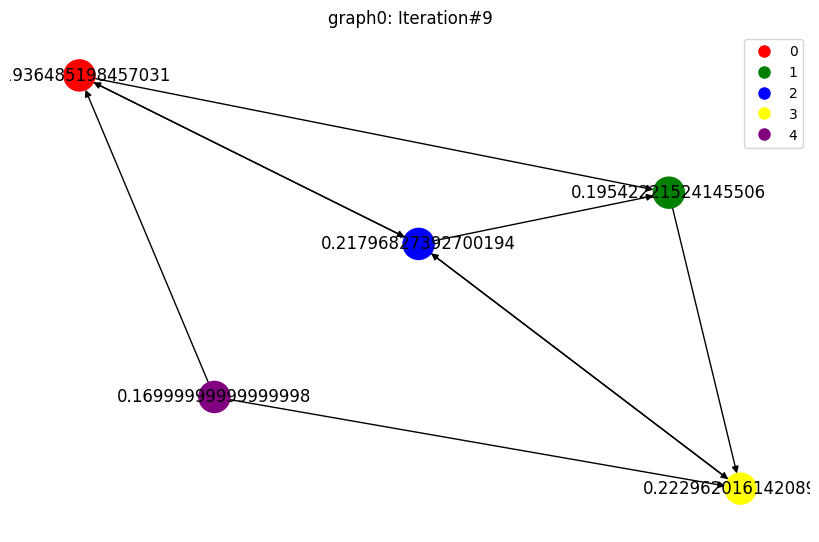

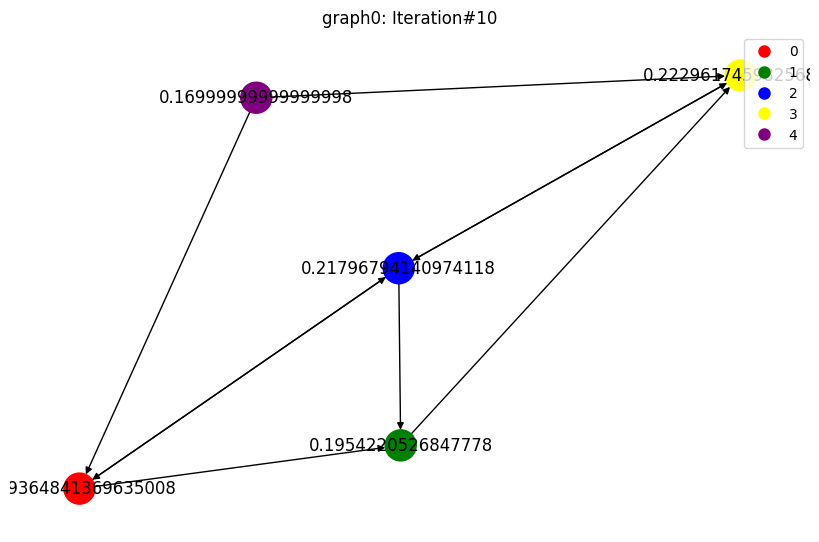

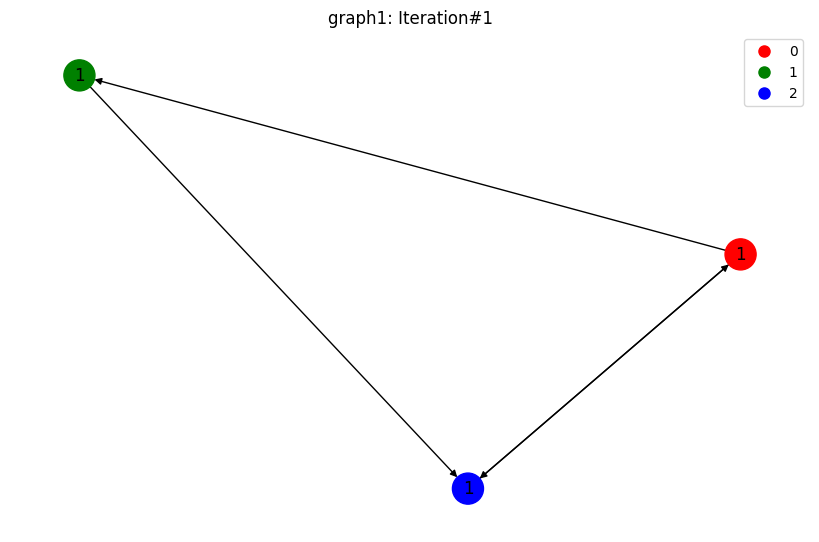

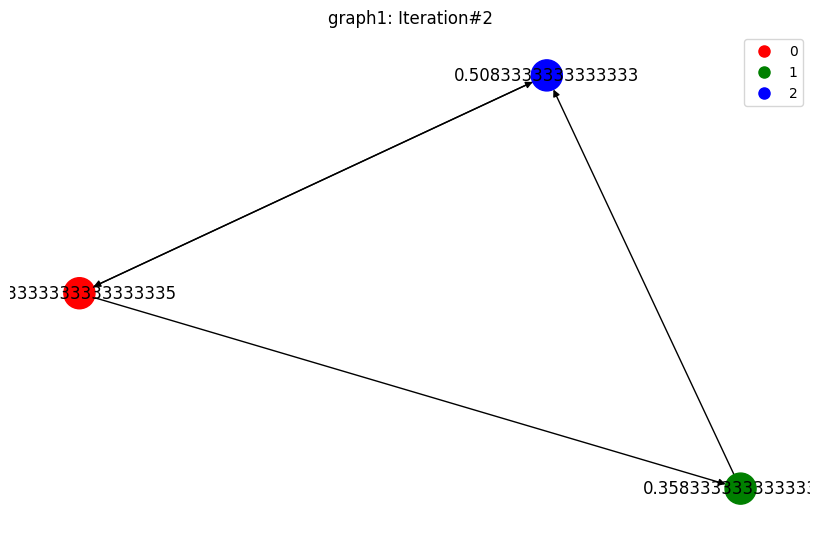

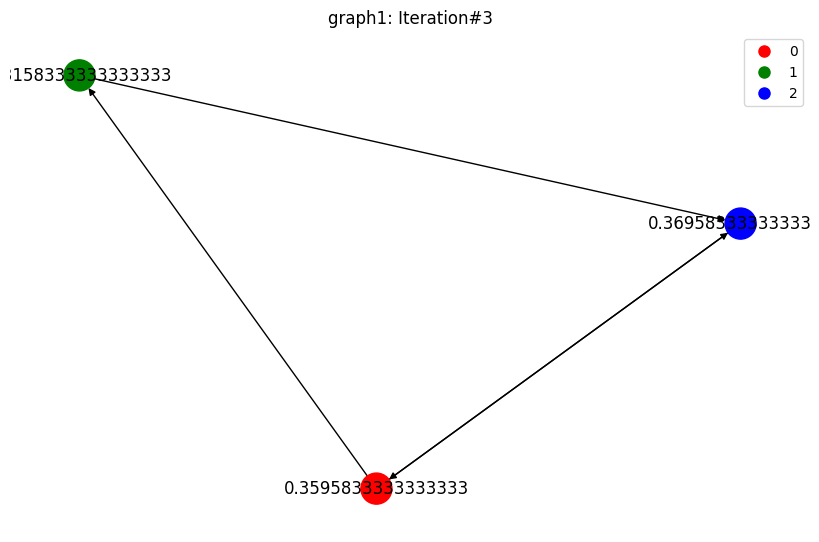

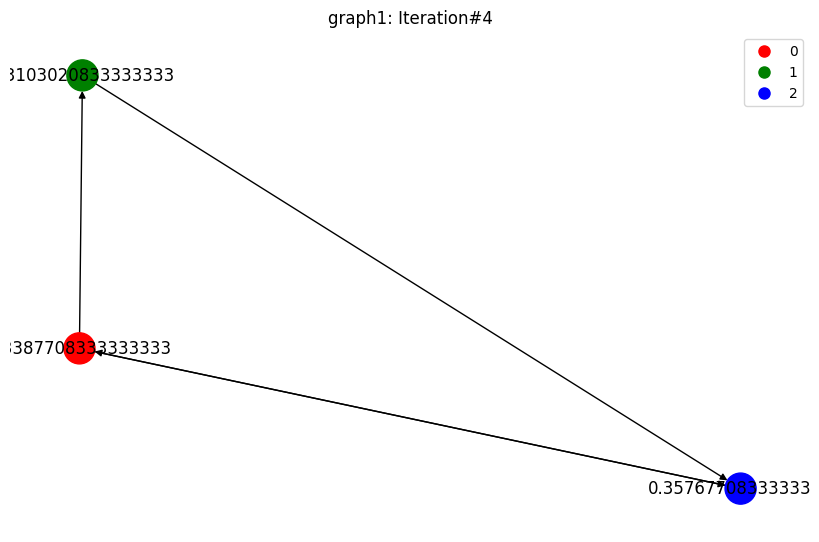

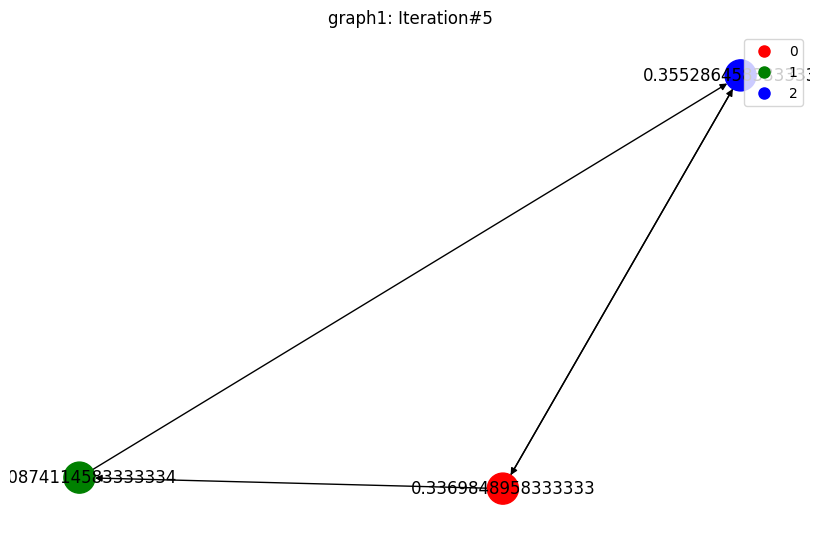

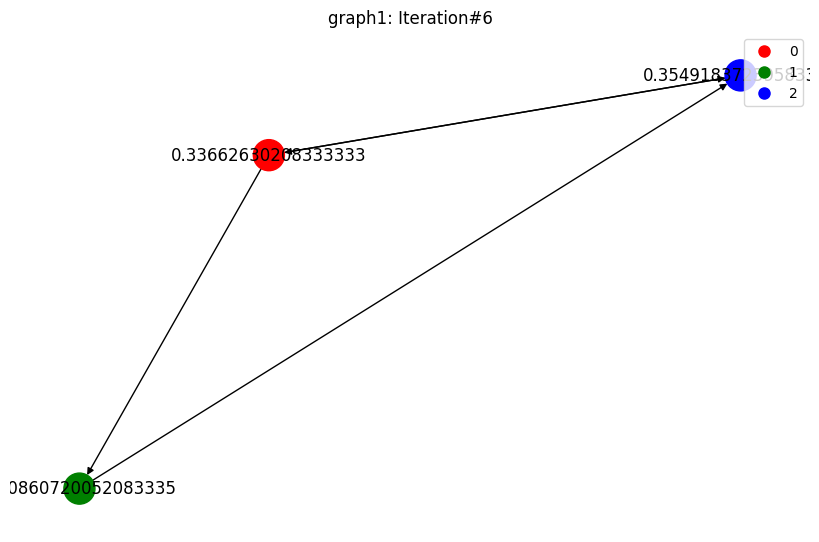

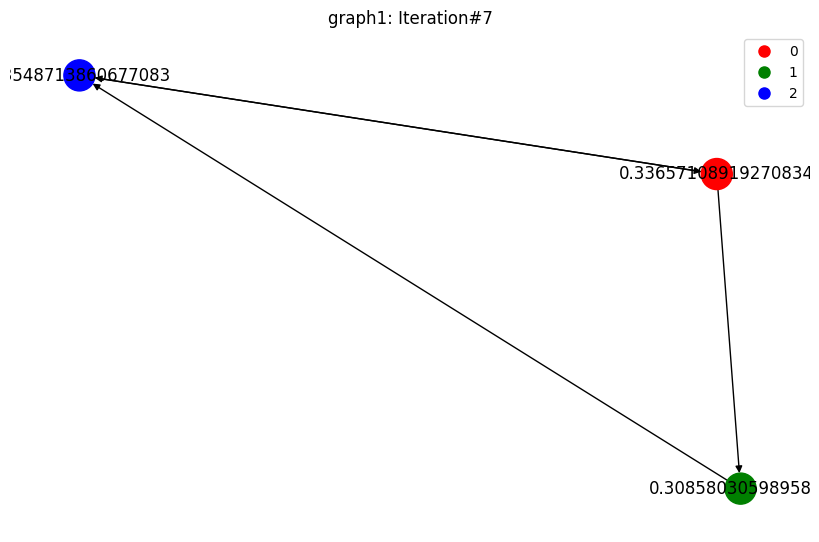

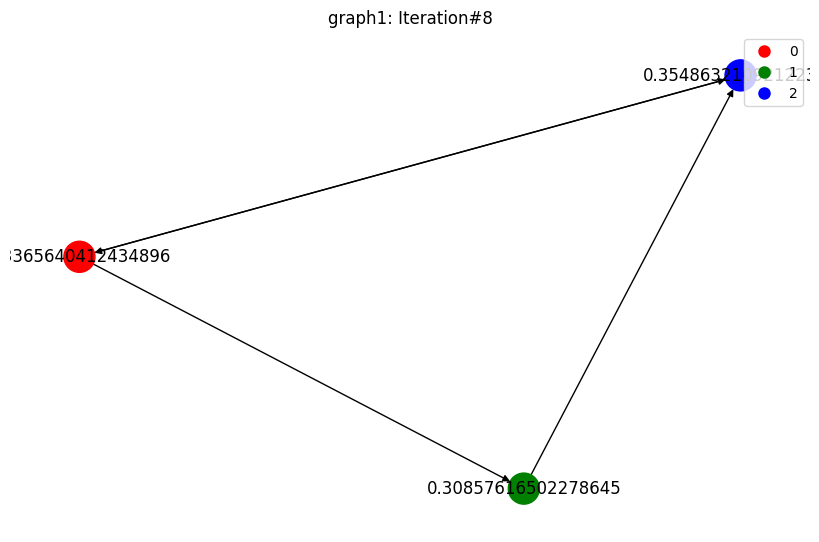

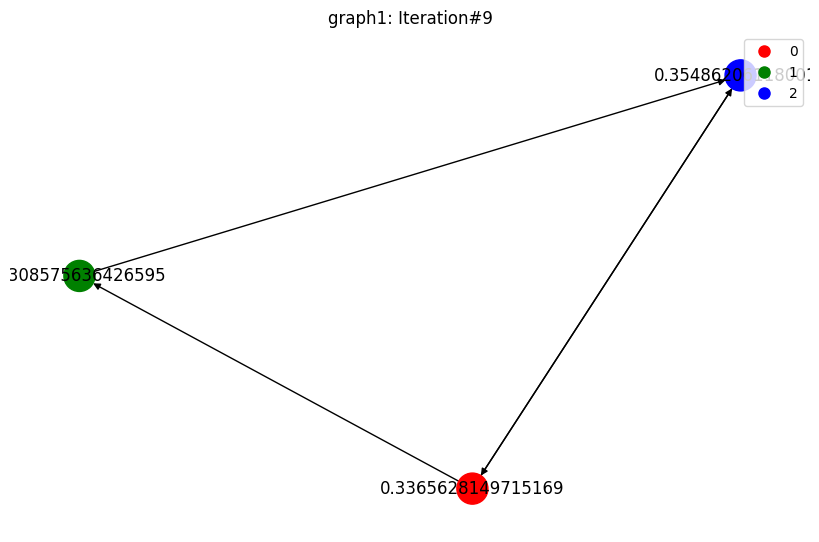

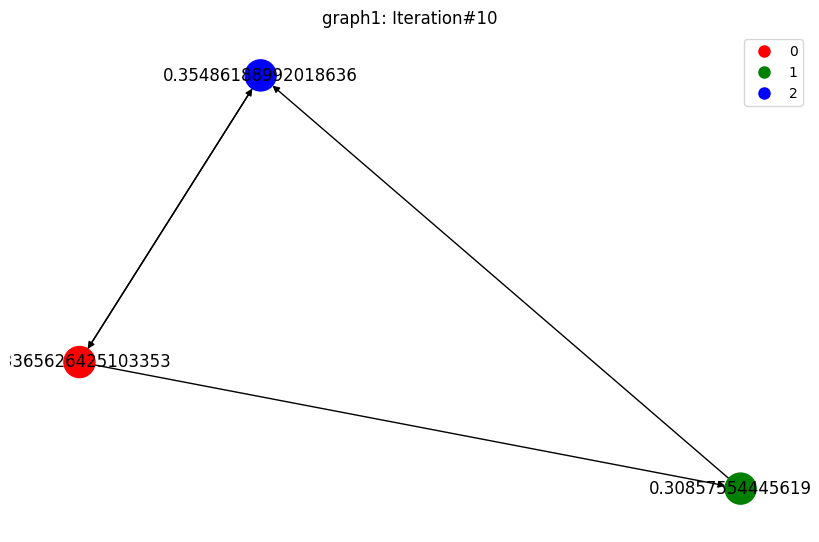

In [219]:
node_colors = ['red', 'green', 'blue', 'yellow', 'purple']

for graph_name in graphs:
  graph = graphs[graph_name]

  node_color_map = {node: color for node, color in zip(graph.nodes, node_colors)}
  legend_labels = {color: node for node, color in node_color_map.items()}
  legend_handles = [plt.Line2D([], [], color=color,
                               marker='o',
                               linestyle='None', 
                               markersize=8, 
                               label=label
                               )
                    for color, label in legend_labels.items()]


  for iteration_number in range(1, iterations_count + 1):
    plt.figure(figsize=(8,5))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos=pos, node_size=500,
            node_color=[node_color_map[node] for node in graph.nodes],
            labels=scores[graph_name][f'iteration{iteration_number}'],
            with_labels=True)
    
    plt.title(f"{graph_name}: Iteration#{iteration_number}")
    plt.legend(handles=legend_handles)
    plt.savefig(plots_path + f"{graph_name}: Iteration#{iteration_number}.png")
    plt.show()